# 실루엣 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- 아이리스 데이터 클러스터링 평가

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [5]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(3)

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


- 실루엣 계수(Silhoutte)

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris_std, kmeans.labels_)
df['실루엣 계수'] = sil_samples
df.head()

,sl,sw,pl,pw,target,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547
3,4.6,3.1,1.5,0.2,0,1,0.620502
4,5.0,3.6,1.4,0.2,0,1,0.728474


- 실루엣 스코어: 실루엣 계수의 평균

In [7]:
silhouette_score(iris_std, kmeans.labels_)

0.45994823920518635

In [8]:
df['실루엣 계수'].mean()

0.45994823920518646

In [9]:
df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.347392
1    0.636316
2    0.393377
Name: 실루엣 계수, dtype: float64

- 실루엣 계수의 시각화

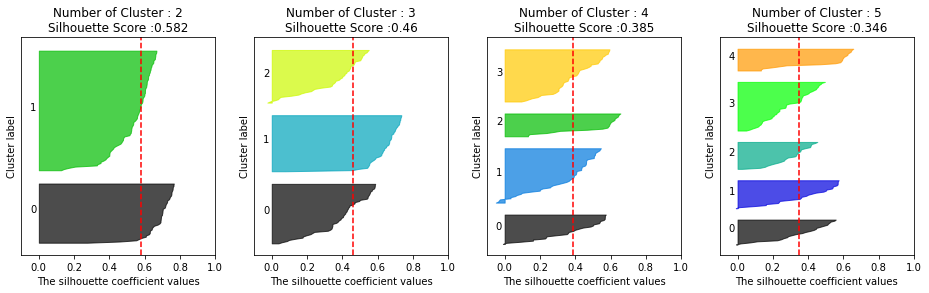

In [11]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)